**Neural Network Regression with TensorFlow**

**What is Regression?**

Regression is a type of problem where we try to predict a number. For example:

* Predicting the price of a house based on its features (like the number of rooms and size)
* Predicting the location of an object in an image
* Predicting the cost of health insurance based on a person's age, sex, and other characteristics

In this lesson, we'll learn how to use a type of machine learning called neural networks to solve these kinds of problems.

**What We'll Cover**

We'll go through the following steps using TensorFlow:

* Building a neural network to predict a number
* Understanding the shape of our data (inputs and outputs)
* Creating a simple dataset to practice with
* Training our model to find patterns in the data
* Evaluating how well our model is working
* Visualizing our results to understand them better
* Saving our model so we can use it later

Don't worry if these terms are unfamiliar - we'll go through each step together!

**How to Get the Most Out of This Lesson**

The best way to learn is by doing. Instead of just reading through the code, try writing it yourself in a new notebook. Experiment with different values and see what happens. Don't be afraid to make mistakes - they're an important part of the learning process!

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


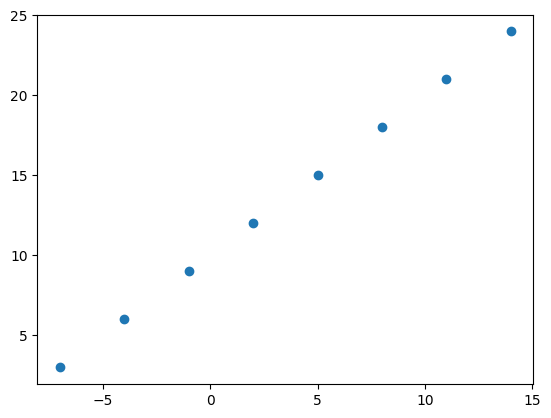

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x,y)

In [ ]:
y ==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Understanding Input and Output Shapes**

When working with neural networks, it's crucial to understand the shapes of your input and output data.

**Input Shape**: This refers to the shape of the data that you feed into the model.

**Output Shape**: This is the shape of the data that you want the model to produce.

These shapes can vary depending on the specific problem you're trying to solve.

Neural networks work with numbers, which are typically represented as tensors or arrays. In our previous example, we used NumPy arrays to create data, but we could have also used tensors.

In [ ]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

**Wait, What? No Shape?**

You might be thinking, "How can our inputs and outputs not have a shape?"

But that's not exactly what's going on. The thing is, no matter what kind of data we feed into our model, it's always going to be in the form of a tensor.

In our case, because we're working with a simple dataset of just two small lists of numbers, our tensors are actually a special type called rank 0 tensors, or scalars.

In [ ]:
# Turn our Numpy array into tensors
x = tf.constant(x)
y = tf.constant(y)

**Building a Neural Network with TensorFlow**

Now that we have our data and understand the input and output shapes, let's build a neural network to model it.

In TensorFlow, there are three main steps to create and train a model:

1. **Create a Model**: Build the layers of a neural network using the Functional or Sequential API, or import a pre-built model (transfer learning).
2. **Compile a Model**: Define how to measure the model's performance (loss and metrics) and how to improve it (optimizer).
3. **Fit a Model**: Let the model find patterns in the data (how `X` relates to `y`).

Let's use the Keras Sequential API to build a model for our regression data and then step through each process.

**Important Note:** If you're using TensorFlow 2.7.0 or later, the `fit()` function no longer automatically upscales input data. To fix this, you need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`. In our case, this means using `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)` instead of `model.fit(X, y, epochs=5)`.

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a mdoel using sequential model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.MAE # Or metrics=["mae"]
              )
#3. Fit the model    tf.expand_dims(X, axis=-1)
model.fit(tf.expand_dims(x, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 326ms/step - loss: 19.2019 - mean_absolute_error: 19.2019
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 18.9206 - mean_absolute_error: 18.9206
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 18.6394 - mean_absolute_error: 18.6394
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 18.3581 - mean_absolute_error: 18.3581
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 18.0769 - mean_absolute_error: 18.0769


In [ ]:
model.predict([17])

1/1 [==============================] - 0s 64ms/step


array([[-16.391722]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [ ]:
# Let's rebuild our model
# Set random seed
tf.random.set_seed(42)

#1. Create a mdoel using sequential model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
              metrics = tf.keras.metrics.MAE # Or metrics=["mae"]
              )
#3. Fit the model    tf.expand_dims(X, axis=-1)
model.fit(tf.expand_dims(x, axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 730ms/step - loss: 13.6399 - mean_absolute_error: 13.6399
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0323 - mean_absolute_error: 13.0323
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4247 - mean_absolute_error: 12.4247
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8157 - mean_absolute_error: 11.8157
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2034 - mean_absolute_error: 11.2034
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5866 - mean_absolute_error: 10.5866
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.9639 - mean_absolute_error: 9.9639
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3338 - mean_absolute_error: 9.3338
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6949 - mean_absolute_error: 8.6949
Epoch 

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 55ms/step


array([[29.69931]], dtype=float32)

In [ ]:
# Let's rebuild our model
# Set random seed
tf.random.set_seed(42)

#1. Create a mdoel using sequential model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(50, activation=None),
          tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = ["mae"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = tf.keras.metrics.MAE # Or metrics=["mae"]
              )
#3. Fit the model    tf.expand_dims(X, axis=-1)
model.fit(tf.expand_dims(x, axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1017 - mean_absolute_error: 13.1017
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4189 - mean_absolute_error: 12.4189
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7324 - mean_absolute_error: 11.7324
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0409 - mean_absolute_error: 11.0409
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.3430 - mean_absolute_error: 10.3430
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6374 - mean_absolute_error: 9.6374
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9226 - mean_absolute_error: 8.9226
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1968 - mean_absolute_error: 8.1968
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4574 - mean_absolute_error: 7.4574
Epoch 10/10

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 76ms/step


array([[25.227705]], dtype=float32)

In [ ]:
# Remind ourselves of what X and y are
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [ ]:
#Make a bigger dataset
X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

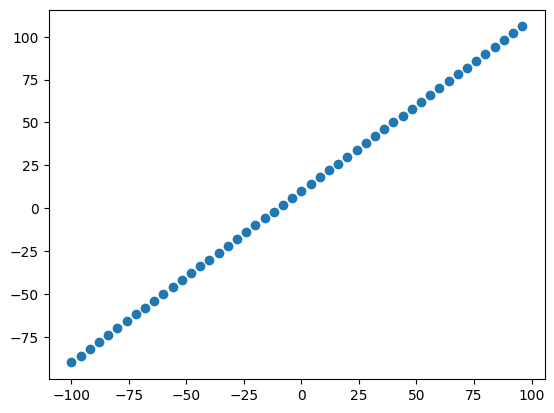

In [ ]:
#visualize the data
plt.scatter(X,y)

In [ ]:
len(X)

50

In [ ]:
# from sklearn.model_selection import train_test_split
# xtr, ytr, xte, yte = train_test_split(X,y, test_size=0.2)

# remember that :
#Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices for this function,but we have got array([ 5, 28, 13, 49, 32, 44, 38,  6, 46, 30, 21,  2,  8, 31, 34, 10,  4,
#       27, 22, 16, 48, 35, 17,  1, 20, 36, 29, 37, 41, 26, 42, 47,  9, 39,
#       14, 15, 33,  0, 45, 11])


So, let's do this manually.

In [ ]:
xtr =  X[:40]
ytr = y[:40]
xte = X[40:]
yte = y[40:]
len(xtr), len(xte),len(ytr),  len(yte)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

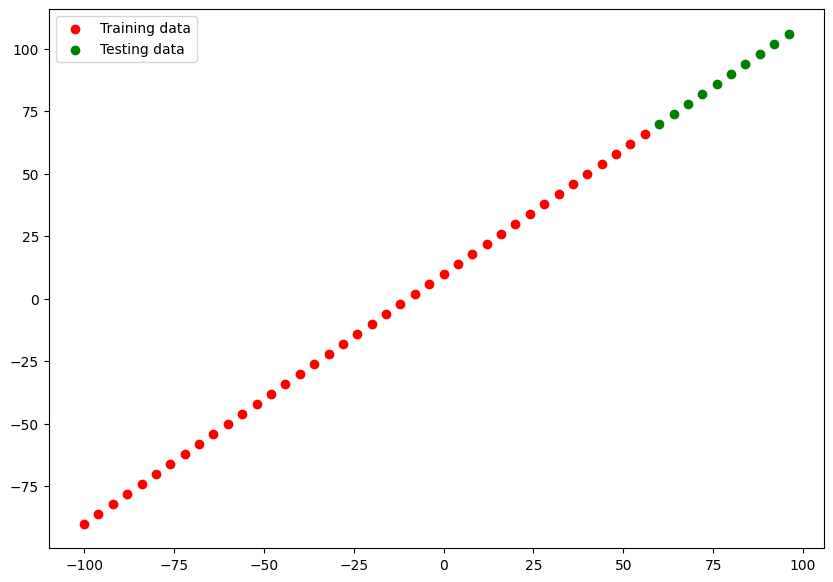

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(xtr,ytr, c="r", label= "Training data")
plt.scatter(xte,yte, c="g", label ="Testing data")
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

In [ ]:
# # Doesn't work (model not fit/built)
# model.summary()

Ahh, the cell above errors because we haven't fit or built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [154]:
from os import name
from ast import Name
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # define the input_shape to our model
  tf.keras.layers.Dense(1, name= "output_layer"),

  ], name="prici")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [155]:
model.summary()

Model: "prici"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
**Parameters**- Weight & bias.

* **Total params** - total number of parameters in the model. **2 X (number of input in Desnse layer)**

* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).


For now, all you need to think about these parameters is that their learnable patterns in the data.


In [156]:
# Fit the model
model.fit(xtr, ytr,  epochs=100, verbose=0)

In [157]:
model.summary()

Model: "prici"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


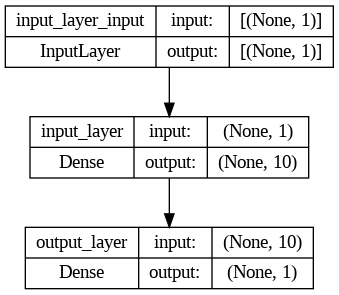

In [158]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)